In [1]:
import tensorflow as tf
import scipy.io as sio 
import numpy as np
import pandas as pd
#import tensorflow as tf
#from keras import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model

from tensorflow.python.client import device_lib

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']



i=sio.loadmat('inputFeatures.mat')
print(sorted(i.keys()))

TTest=i['TTest']
#print(TTest)

print("TTest:",TTest.shape)
#print(TTest)
#print(type(TTest))

TTrain=i['TTrain']
print("TTrain:",TTrain.shape)
# print(TTrain)

XTrain=i['XTrain']
print("XTrain:",XTrain.shape)
#print(XTrain)
#print(type(XTrain))

XTest=i['XTest']
print("XTest:",XTest.shape)
# print(XTest)
# print(type(XTest))

# XTrain=XTrain.reshape(-1)
# TTrain=TTrain.reshape(-1)
# XTest=XTest.reshape(-1)
# TTest=TTest.reshape(-1)

#print(XTrain)

#column_series = pd.DataFrame(np.array(XTrain))
#print(column_series[0])


# data=np.transpose(np.array(XTrain[0]))
# data1=np.transpose(np.array(XTrain[1]))
# test=np.stack((data,data1),axis=0)
# data2=np.transpose(np.array(XTrain[2]))
# a=[]
# a.append(data)
# a.append(data1)
# a.append(data2)
# #print(a)
# a=np.stack(a)
#print(a)
#print(a.shape)


##________________________________________TEST
test=np.transpose(XTrain).reshape(-1)
test2=np.transpose(XTest).reshape(-1)

#print(test)
list_test=[]
for i in range(len(test)):
    test[i]=np.transpose(np.array(test[i]))
    list_test.append(test[i])

for j in range(len(test2)):  
    test2[j]=np.transpose(np.array(test2[j]))
    list_test.append(test2[j])  
    
list_test=np.vstack(list_test)
scaler = StandardScaler()
scaler=scaler.fit(list_test)
scaled_list_test=scaler.transform(list_test)
print(scaled_list_test)
print(scaled_list_test.shape)

# XTrain_s=scaled_list_test[:-340*50]
# XTest_s=scaled_list_test[-340*50:]
# print(len(XTest_s))
# print(len(XTrain_s))

##________________________________________BKU
# df=pd.DataFrame(list_test)
# df.columns = ['C1','C2','C3','C4']
# print(df)
# normalized_df=(df-df.mean())/df.std()
# #print(normalized_df.shape)
#________________________________________
#print(normalized_df)
#normalized_df=normalized_df.to_numpy()

# FOR 2D INPUT - RESHAPE TO 3D AS BELOW
#normalized_df=normalized_df.reshape(67950,1,4)
#print(normalized_df)
#TTrain=np.repeat(TTrain,50)

#normalized_df=scaled_list_test

# Restack scaled_ to 3D input (X,50,4)
XT_s_stack=list()
i=0
while i+50 <= (len(scaled_list_test)):
    XT_s_stack.append(scaled_list_test[i:i+50])
    i=i+50

#print(listTest)
XT_s_stack=np.stack(XT_s_stack)
#print(listTest.shape)



#scaled_list_test
# XTest_s_list=[]

# j=0
# while j < (len(XTest_s)):
#     XTest_s_list.append(XTest_s[j:j+50])
#     j=j+50

# XTest_s_stack=np.stack(XTest_s_list)
# print(XTest_s_stack.shape)

XTrain_s=XT_s_stack[:-340,:,:]
XTest_s=XT_s_stack[-340:,:,:]
print(XTrain_s.shape,XTest_s.shape)






# testArr=np.vstack([i[0].T for i in XTest])
# # for i in range(len(XTest)):
# #     testArr.append(np.transpose(np.array(XTest[i])))

# # testArr=np.stack(testArr)

# while i < (len(testArr)):
#     listTest.append(testArr[i:i+50])
#     i=i+50
# testArr=testArr.stack(testArr)
# print(testArr.shape)

length = 50
n_features = 4
model = Sequential()
model.add(Bidirectional(LSTM(150),input_shape=(length,n_features)))
#model.add(tf.keras.layers.RNN(tf.keras.layers.LSTMCell(150)),input_shape=(length,n_features))
model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))

#model.add(Dense(1, activation='linear'))
model.add(Dense(1,activation='linear'))

#opt=Adam(learning_rate=0.02)
#model.compile(optimizer=opt, loss='mean_squared_logarithmic_error')

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
model.summary()
  
with tf.device('/gpu:0'):
    #,validation_data=(testArr,TTest)
    model.fit(XTrain_s,np.array(TTrain),epochs=1000,verbose=2)


with tf.device('/cpu:0'):
    Y_hat=model.predict(XTest_s)
    
    
    
#print(Y_hat)
TTest=TTest.reshape(len(TTest),1)
#print(np.array(TTest))

test=np.transpose(XTrain).flatten()
#print(test)
list_test=list()
for i in test:
    #test[i]=np.transpose(np.array(i))
    list_test.append(np.array(i))

list_test=np.vstack(list_test)
x=np.stack(list_test)

print(x)

['TTest', 'TTrain', 'XTest', 'XTrain', '__globals__', '__header__', '__version__']
TTest: (340, 1)
TTrain: (1359, 1)
XTrain: (1359, 1)
XTest: (340, 1)
[[ 0.32655452  0.25573467 -0.07921549  0.0012053 ]
 [ 0.30185115  0.48721125 -0.07470362  0.02826578]
 [ 0.28390957  0.72243757 -0.08147142  0.00346827]
 ...
 [-0.40089492 -0.55935058 -0.04312054 -0.05766431]
 [-0.39415252 -0.69639731 -0.04913636 -0.05816542]
 [-0.38046067 -0.2924365  -0.03860867 -0.06640565]]
(84950, 4)
(1359, 50, 4) (340, 50, 4)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 300)              186000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                4816      
                                                                 
 dense_1 (Dense) 

Epoch 105/1000
43/43 - 1s - loss: 0.0810 - 642ms/epoch - 15ms/step
Epoch 106/1000
43/43 - 1s - loss: 0.0792 - 598ms/epoch - 14ms/step
Epoch 107/1000
43/43 - 1s - loss: 0.0766 - 654ms/epoch - 15ms/step
Epoch 108/1000
43/43 - 1s - loss: 0.0755 - 678ms/epoch - 16ms/step
Epoch 109/1000
43/43 - 1s - loss: 0.0786 - 668ms/epoch - 16ms/step
Epoch 110/1000
43/43 - 1s - loss: 0.0808 - 606ms/epoch - 14ms/step
Epoch 111/1000
43/43 - 1s - loss: 0.0798 - 603ms/epoch - 14ms/step
Epoch 112/1000
43/43 - 1s - loss: 0.0810 - 631ms/epoch - 15ms/step
Epoch 113/1000
43/43 - 1s - loss: 0.0783 - 616ms/epoch - 14ms/step
Epoch 114/1000
43/43 - 1s - loss: 0.0791 - 616ms/epoch - 14ms/step
Epoch 115/1000
43/43 - 1s - loss: 0.0767 - 607ms/epoch - 14ms/step
Epoch 116/1000
43/43 - 1s - loss: 0.0757 - 609ms/epoch - 14ms/step
Epoch 117/1000
43/43 - 1s - loss: 0.0764 - 631ms/epoch - 15ms/step
Epoch 118/1000
43/43 - 1s - loss: 0.1384 - 602ms/epoch - 14ms/step
Epoch 119/1000
43/43 - 1s - loss: 0.0988 - 631ms/epoch - 15ms/

Epoch 228/1000
43/43 - 1s - loss: 0.0463 - 593ms/epoch - 14ms/step
Epoch 229/1000
43/43 - 1s - loss: 0.0510 - 619ms/epoch - 14ms/step
Epoch 230/1000
43/43 - 1s - loss: 0.0518 - 632ms/epoch - 15ms/step
Epoch 231/1000
43/43 - 1s - loss: 0.0513 - 616ms/epoch - 14ms/step
Epoch 232/1000
43/43 - 1s - loss: 0.0583 - 616ms/epoch - 14ms/step
Epoch 233/1000
43/43 - 1s - loss: 0.0487 - 627ms/epoch - 15ms/step
Epoch 234/1000
43/43 - 1s - loss: 0.0508 - 603ms/epoch - 14ms/step
Epoch 235/1000
43/43 - 1s - loss: 0.0445 - 659ms/epoch - 15ms/step
Epoch 236/1000
43/43 - 1s - loss: 0.0519 - 653ms/epoch - 15ms/step
Epoch 237/1000
43/43 - 1s - loss: 0.0462 - 664ms/epoch - 15ms/step
Epoch 238/1000
43/43 - 1s - loss: 0.0703 - 655ms/epoch - 15ms/step
Epoch 239/1000
43/43 - 1s - loss: 0.0580 - 620ms/epoch - 14ms/step
Epoch 240/1000
43/43 - 1s - loss: 0.0544 - 648ms/epoch - 15ms/step
Epoch 241/1000
43/43 - 1s - loss: 0.0514 - 627ms/epoch - 15ms/step
Epoch 242/1000
43/43 - 1s - loss: 0.0498 - 650ms/epoch - 15ms/

Epoch 351/1000
43/43 - 1s - loss: 0.0164 - 601ms/epoch - 14ms/step
Epoch 352/1000
43/43 - 1s - loss: 0.0127 - 588ms/epoch - 14ms/step
Epoch 353/1000
43/43 - 1s - loss: 0.0111 - 570ms/epoch - 13ms/step
Epoch 354/1000
43/43 - 1s - loss: 0.0118 - 612ms/epoch - 14ms/step
Epoch 355/1000
43/43 - 1s - loss: 0.0109 - 632ms/epoch - 15ms/step
Epoch 356/1000
43/43 - 1s - loss: 0.0096 - 633ms/epoch - 15ms/step
Epoch 357/1000
43/43 - 1s - loss: 0.0146 - 648ms/epoch - 15ms/step
Epoch 358/1000
43/43 - 1s - loss: 0.0184 - 627ms/epoch - 15ms/step
Epoch 359/1000
43/43 - 1s - loss: 0.0203 - 640ms/epoch - 15ms/step
Epoch 360/1000
43/43 - 1s - loss: 0.0103 - 666ms/epoch - 15ms/step
Epoch 361/1000
43/43 - 1s - loss: 0.0087 - 649ms/epoch - 15ms/step
Epoch 362/1000
43/43 - 1s - loss: 0.0077 - 664ms/epoch - 15ms/step
Epoch 363/1000
43/43 - 1s - loss: 0.0099 - 666ms/epoch - 15ms/step
Epoch 364/1000
43/43 - 1s - loss: 0.0092 - 620ms/epoch - 14ms/step
Epoch 365/1000
43/43 - 1s - loss: 0.0072 - 632ms/epoch - 15ms/

Epoch 474/1000
43/43 - 1s - loss: 0.0040 - 665ms/epoch - 15ms/step
Epoch 475/1000
43/43 - 1s - loss: 0.0043 - 634ms/epoch - 15ms/step
Epoch 476/1000
43/43 - 1s - loss: 0.0054 - 602ms/epoch - 14ms/step
Epoch 477/1000
43/43 - 1s - loss: 0.0108 - 584ms/epoch - 14ms/step
Epoch 478/1000
43/43 - 1s - loss: 0.0041 - 582ms/epoch - 14ms/step
Epoch 479/1000
43/43 - 1s - loss: 0.0037 - 599ms/epoch - 14ms/step
Epoch 480/1000
43/43 - 1s - loss: 0.0055 - 570ms/epoch - 13ms/step
Epoch 481/1000
43/43 - 1s - loss: 0.0056 - 579ms/epoch - 13ms/step
Epoch 482/1000
43/43 - 1s - loss: 0.0029 - 626ms/epoch - 15ms/step
Epoch 483/1000
43/43 - 1s - loss: 0.0026 - 620ms/epoch - 14ms/step
Epoch 484/1000
43/43 - 1s - loss: 0.0025 - 632ms/epoch - 15ms/step
Epoch 485/1000
43/43 - 1s - loss: 0.0018 - 586ms/epoch - 14ms/step
Epoch 486/1000
43/43 - 1s - loss: 0.0017 - 615ms/epoch - 14ms/step
Epoch 487/1000
43/43 - 1s - loss: 0.0020 - 678ms/epoch - 16ms/step
Epoch 488/1000
43/43 - 1s - loss: 0.0017 - 667ms/epoch - 16ms/

Epoch 597/1000
43/43 - 1s - loss: 0.0171 - 642ms/epoch - 15ms/step
Epoch 598/1000
43/43 - 1s - loss: 0.0169 - 643ms/epoch - 15ms/step
Epoch 599/1000
43/43 - 1s - loss: 0.0201 - 628ms/epoch - 15ms/step
Epoch 600/1000
43/43 - 1s - loss: 0.0160 - 633ms/epoch - 15ms/step
Epoch 601/1000
43/43 - 1s - loss: 0.0157 - 634ms/epoch - 15ms/step
Epoch 602/1000
43/43 - 1s - loss: 0.0137 - 633ms/epoch - 15ms/step
Epoch 603/1000
43/43 - 1s - loss: 0.0117 - 616ms/epoch - 14ms/step
Epoch 604/1000
43/43 - 1s - loss: 0.0112 - 633ms/epoch - 15ms/step
Epoch 605/1000
43/43 - 1s - loss: 0.0153 - 647ms/epoch - 15ms/step
Epoch 606/1000
43/43 - 1s - loss: 0.0150 - 627ms/epoch - 15ms/step
Epoch 607/1000
43/43 - 1s - loss: 0.0128 - 639ms/epoch - 15ms/step
Epoch 608/1000
43/43 - 1s - loss: 0.0124 - 649ms/epoch - 15ms/step
Epoch 609/1000
43/43 - 1s - loss: 0.0070 - 633ms/epoch - 15ms/step
Epoch 610/1000
43/43 - 1s - loss: 0.0166 - 649ms/epoch - 15ms/step
Epoch 611/1000
43/43 - 1s - loss: 0.0068 - 652ms/epoch - 15ms/

Epoch 720/1000
43/43 - 1s - loss: 0.0014 - 583ms/epoch - 14ms/step
Epoch 721/1000
43/43 - 1s - loss: 0.0013 - 585ms/epoch - 14ms/step
Epoch 722/1000
43/43 - 1s - loss: 0.0028 - 645ms/epoch - 15ms/step
Epoch 723/1000
43/43 - 1s - loss: 0.0017 - 618ms/epoch - 14ms/step
Epoch 724/1000
43/43 - 1s - loss: 0.0022 - 569ms/epoch - 13ms/step
Epoch 725/1000
43/43 - 1s - loss: 0.0034 - 597ms/epoch - 14ms/step
Epoch 726/1000
43/43 - 1s - loss: 0.0017 - 569ms/epoch - 13ms/step
Epoch 727/1000
43/43 - 1s - loss: 0.0011 - 594ms/epoch - 14ms/step
Epoch 728/1000
43/43 - 1s - loss: 0.0012 - 619ms/epoch - 14ms/step
Epoch 729/1000
43/43 - 1s - loss: 0.0124 - 647ms/epoch - 15ms/step
Epoch 730/1000
43/43 - 1s - loss: 0.0085 - 587ms/epoch - 14ms/step
Epoch 731/1000
43/43 - 1s - loss: 0.0038 - 597ms/epoch - 14ms/step
Epoch 732/1000
43/43 - 1s - loss: 0.0021 - 653ms/epoch - 15ms/step
Epoch 733/1000
43/43 - 1s - loss: 0.0022 - 631ms/epoch - 15ms/step
Epoch 734/1000
43/43 - 1s - loss: 0.0016 - 660ms/epoch - 15ms/

43/43 - 1s - loss: 0.0034 - 646ms/epoch - 15ms/step
Epoch 841/1000
43/43 - 1s - loss: 0.0021 - 640ms/epoch - 15ms/step
Epoch 842/1000
43/43 - 1s - loss: 0.0047 - 663ms/epoch - 15ms/step
Epoch 843/1000
43/43 - 1s - loss: 0.0026 - 655ms/epoch - 15ms/step
Epoch 844/1000
43/43 - 1s - loss: 0.0014 - 620ms/epoch - 14ms/step
Epoch 845/1000
43/43 - 1s - loss: 9.3179e-04 - 646ms/epoch - 15ms/step
Epoch 846/1000
43/43 - 1s - loss: 7.3096e-04 - 680ms/epoch - 16ms/step
Epoch 847/1000
43/43 - 1s - loss: 7.2562e-04 - 666ms/epoch - 15ms/step
Epoch 848/1000
43/43 - 1s - loss: 6.9019e-04 - 708ms/epoch - 16ms/step
Epoch 849/1000
43/43 - 1s - loss: 8.0841e-04 - 682ms/epoch - 16ms/step
Epoch 850/1000
43/43 - 1s - loss: 7.4345e-04 - 671ms/epoch - 16ms/step
Epoch 851/1000
43/43 - 1s - loss: 7.1541e-04 - 710ms/epoch - 17ms/step
Epoch 852/1000
43/43 - 1s - loss: 5.5636e-04 - 673ms/epoch - 16ms/step
Epoch 853/1000
43/43 - 1s - loss: 0.0011 - 638ms/epoch - 15ms/step
Epoch 854/1000
43/43 - 1s - loss: 7.2942e-04 

43/43 - 1s - loss: 0.0054 - 690ms/epoch - 16ms/step
Epoch 959/1000
43/43 - 1s - loss: 0.0036 - 710ms/epoch - 17ms/step
Epoch 960/1000
43/43 - 1s - loss: 0.0086 - 674ms/epoch - 16ms/step
Epoch 961/1000
43/43 - 1s - loss: 0.0037 - 635ms/epoch - 15ms/step
Epoch 962/1000
43/43 - 1s - loss: 0.0022 - 640ms/epoch - 15ms/step
Epoch 963/1000
43/43 - 1s - loss: 0.0015 - 628ms/epoch - 15ms/step
Epoch 964/1000
43/43 - 1s - loss: 0.0045 - 629ms/epoch - 15ms/step
Epoch 965/1000
43/43 - 1s - loss: 0.0031 - 660ms/epoch - 15ms/step
Epoch 966/1000
43/43 - 1s - loss: 9.5538e-04 - 671ms/epoch - 16ms/step
Epoch 967/1000
43/43 - 1s - loss: 7.3760e-04 - 644ms/epoch - 15ms/step
Epoch 968/1000
43/43 - 1s - loss: 6.8661e-04 - 638ms/epoch - 15ms/step
Epoch 969/1000
43/43 - 1s - loss: 6.1623e-04 - 612ms/epoch - 14ms/step
Epoch 970/1000
43/43 - 1s - loss: 6.9834e-04 - 617ms/epoch - 14ms/step
Epoch 971/1000
43/43 - 1s - loss: 6.2646e-04 - 615ms/epoch - 14ms/step
Epoch 972/1000
43/43 - 1s - loss: 6.7403e-04 - 627ms/

In [2]:
# import scipy.io as sio 
# import numpy as np
# i=sio.loadmat('inputFeatures.mat')
# XTrain=i['XTrain']

# test=np.transpose(XTrain).reshape(-1)
# #print(test)
# list_test=[]
# for i in range(len(test)):
#     test[i]=np.transpose(np.array(test[i]))
#     list_test.append(test[i])

# list_test=np.vstack(list_test)
# print(list_test)

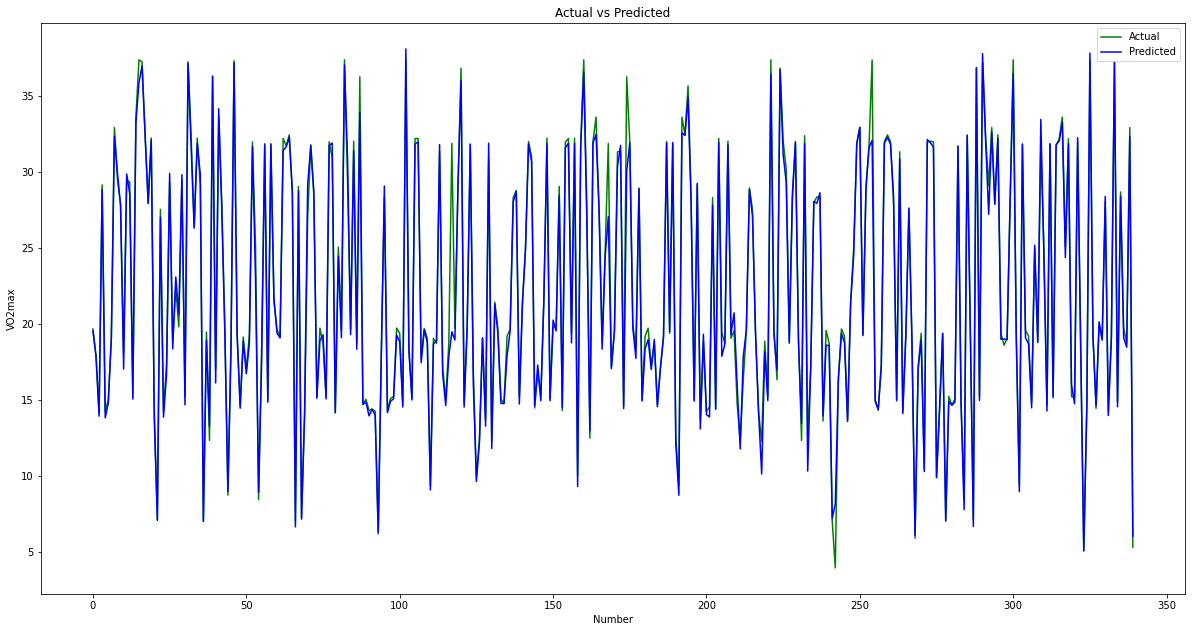

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(TTest,color='green',label='Actual')
plt.plot(Y_hat,color='blue',label='Predicted')
plt.xlabel('Number')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
#plt.figure(figsize=(100,100))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20.5, 10.5)
fig.savefig('test2png.png', dpi=150)

In [4]:
results = model.evaluate(XTest_s,TTest) 
print("test loss", results)
#print('Test score:', results[0])
#print('Test accuracy:', results[1])

11/11 [==============================] - 1s 6ms/step - loss: 0.0028
test loss 0.002802631352096796


In [6]:
model.save('Best__model_bidir_dens16_epoch1000_O1.h5')